In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

In [2]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    return Image.open(Im).size
def get_xy(Im):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [581]:
df = get_data('BLUE.jpeg')
df.iloc[:,2:].drop_duplicates()
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]

In [459]:
im = Image.open('BLUE.jpeg') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('BlueS.png')

ValueError: not enough values to unpack (expected 5, got 1)

In [103]:
df = get_data('BlueS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

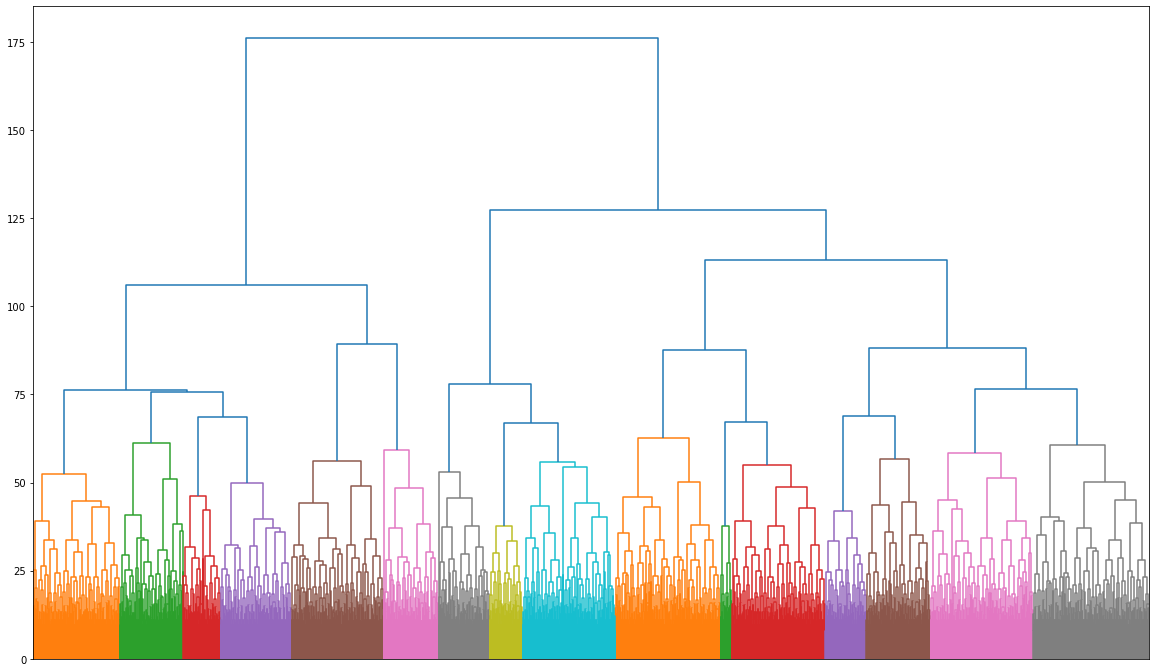

In [104]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 65)
plt.show()
fig.savefig('Blue_Dendrogram.png')

In [105]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')
dfo = get_data('BlueS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [106]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#548ccc (84, 140, 204) (34.28%)',
 '#fcd46c (252, 212, 108) (13.62%)',
 '#140c0c (20, 12, 12) (13.55%)',
 '#d4949c (212, 148, 156) (10.99%)',
 '#dc9cac (220, 156, 172) (10.14%)',
 '#e4b454 (228, 180, 84) (5.18%)',
 '#9c6c74 (156, 108, 116) (2.96%)',
 '#6c94ac (108, 148, 172) (2.36%)',
 '#643414 (100, 52, 20) (2.09%)',
 '#7c5444 (124, 84, 68) (1.80%)',
 '#74acb4 (116, 172, 180) (1.11%)',
 '#4c4c4c (76, 76, 76) (0.83%)',
 '#a47424 (164, 116, 36) (0.46%)',
 '#dcdcd4 (220, 220, 212) (0.31%)',
 '#a42c2c (164, 44, 44) (0.29%)',
 '#cc6474 (204, 100, 116) (0.02%)']

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/1258740287.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc = 10)


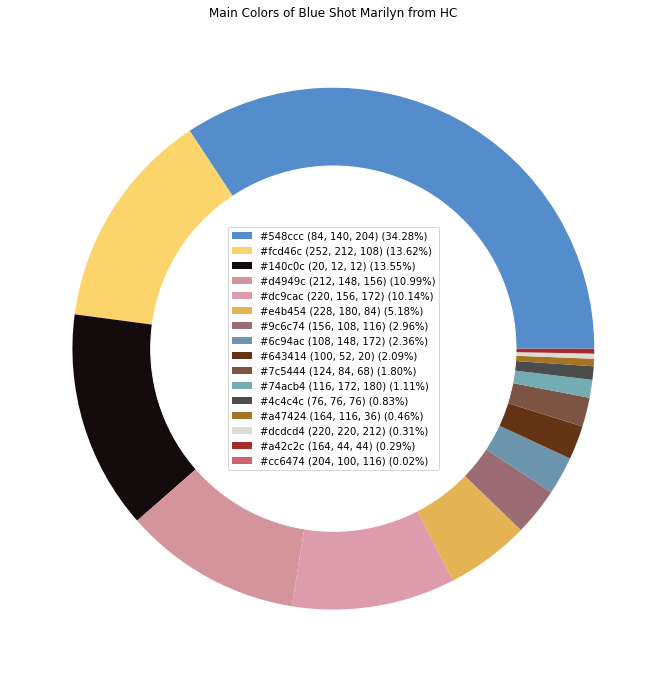

In [108]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props), loc = 10)
plt.title('Main Colors of Blue Shot Marilyn from HC')
plt.show()
fig.savefig('Blue_HC_Donut.jpg')

In [109]:
def inspect(Im,cluster,background = (255,255,255)):
    """View all the pixels in a specific cluster derived from HC"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open(Im)
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = background
    return im    

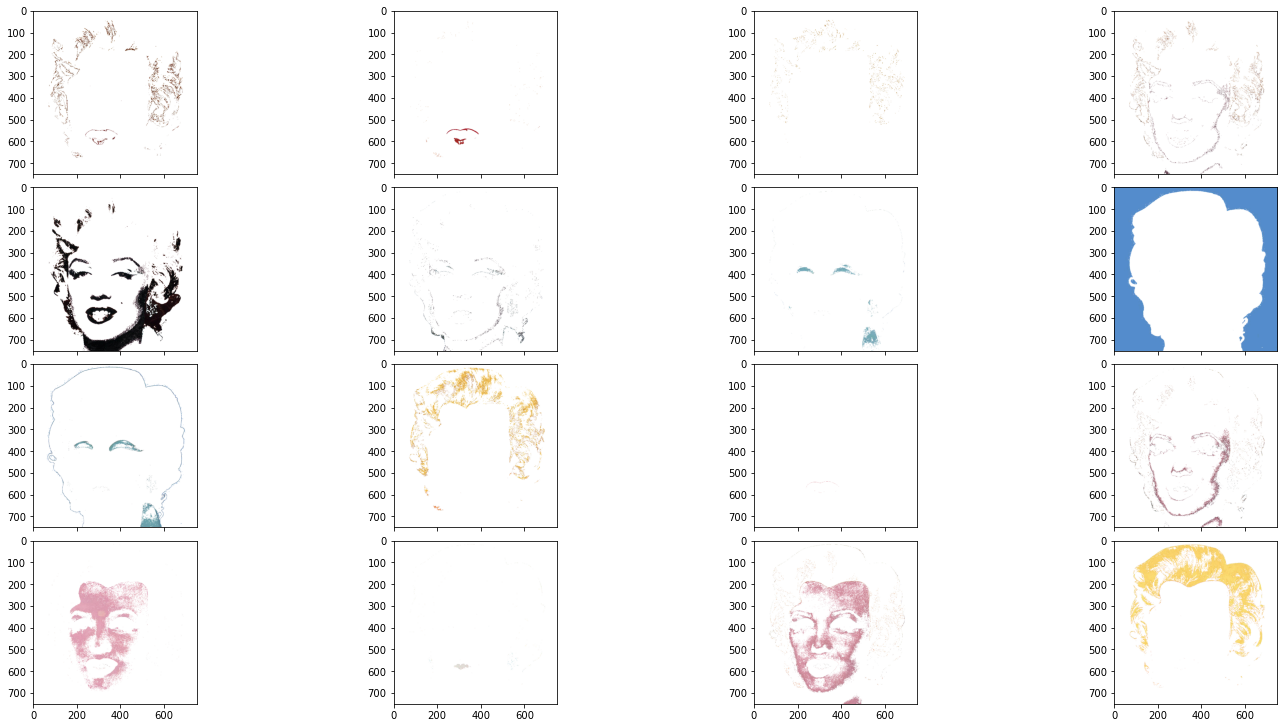

In [110]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('BlueS.png',1)))
ax[0][1].imshow(np.asarray(inspect('BlueS.png',2)))
ax[0][2].imshow(np.asarray(inspect('BlueS.png',3)))
ax[0][3].imshow(np.asarray(inspect('BlueS.png',4)))
ax[1][0].imshow(np.asarray(inspect('BlueS.png',5)))
ax[1][1].imshow(np.asarray(inspect('BlueS.png',6)))
ax[1][2].imshow(np.asarray(inspect('BlueS.png',7)))
ax[1][3].imshow(np.asarray(inspect('BlueS.png',8)))
ax[2][0].imshow(np.asarray(inspect('BlueS.png',9)))
ax[2][1].imshow(np.asarray(inspect('BlueS.png',10)))
ax[2][2].imshow(np.asarray(inspect('BlueS.png',11)))
ax[2][3].imshow(np.asarray(inspect('BlueS.png',12)))
ax[3][0].imshow(np.asarray(inspect('BlueS.png',13)))
ax[3][1].imshow(np.asarray(inspect('BlueS.png',14)))
ax[3][2].imshow(np.asarray(inspect('BlueS.png',15)))
ax[3][3].imshow(np.asarray(inspect('BlueS.png',16)))
fig.savefig('Blue_HC_Clust.jpg')

In [111]:
df = get_data('BlueS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 16, random_state = 0)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [112]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#548ccc (84, 140, 204) (34.54%)',
 '#dc9cac (220, 156, 172) (9.75%)',
 '#d494a4 (212, 148, 164) (9.19%)',
 '#fcd46c (252, 212, 108) (8.41%)',
 '#f4c45c (244, 196, 92) (6.98%)',
 '#0c0c0c (12, 12, 12) (6.95%)',
 '#1c1414 (28, 20, 20) (4.89%)',
 '#bc7c8c (188, 124, 140) (3.33%)',
 '#74a4ac (116, 164, 172) (3.03%)',
 '#442424 (68, 36, 36) (2.73%)',
 '#dca44c (220, 164, 76) (2.59%)',
 '#8c646c (140, 100, 108) (1.85%)',
 '#7c4424 (124, 68, 36) (1.80%)',
 '#5c4c4c (92, 76, 76) (1.74%)',
 '#ac743c (172, 116, 60) (1.56%)',
 '#e4dcb4 (228, 220, 180) (0.67%)']

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/1184227789.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc =10)


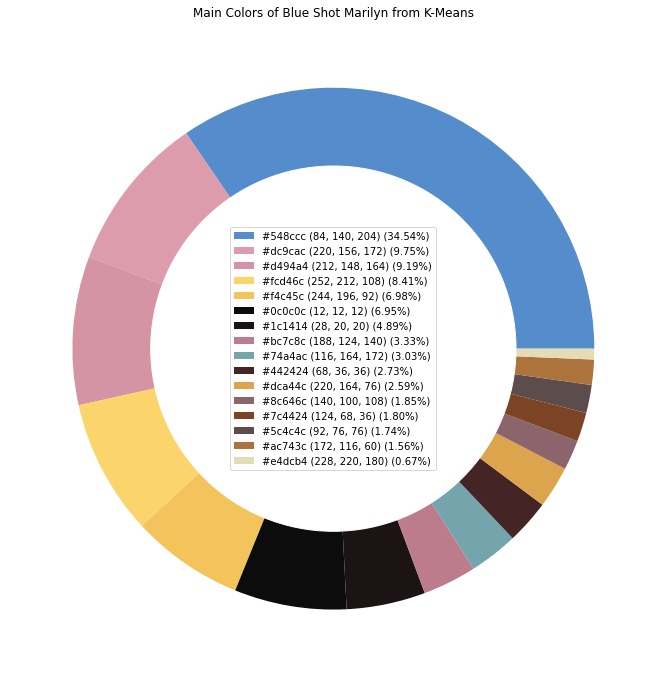

In [114]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Main Colors of Blue Shot Marilyn from K-Means')
plt.legend(patches,labels = np.array(props), loc =10)
plt.show()
fig.savefig('Blue_KM_Donut.jpg')

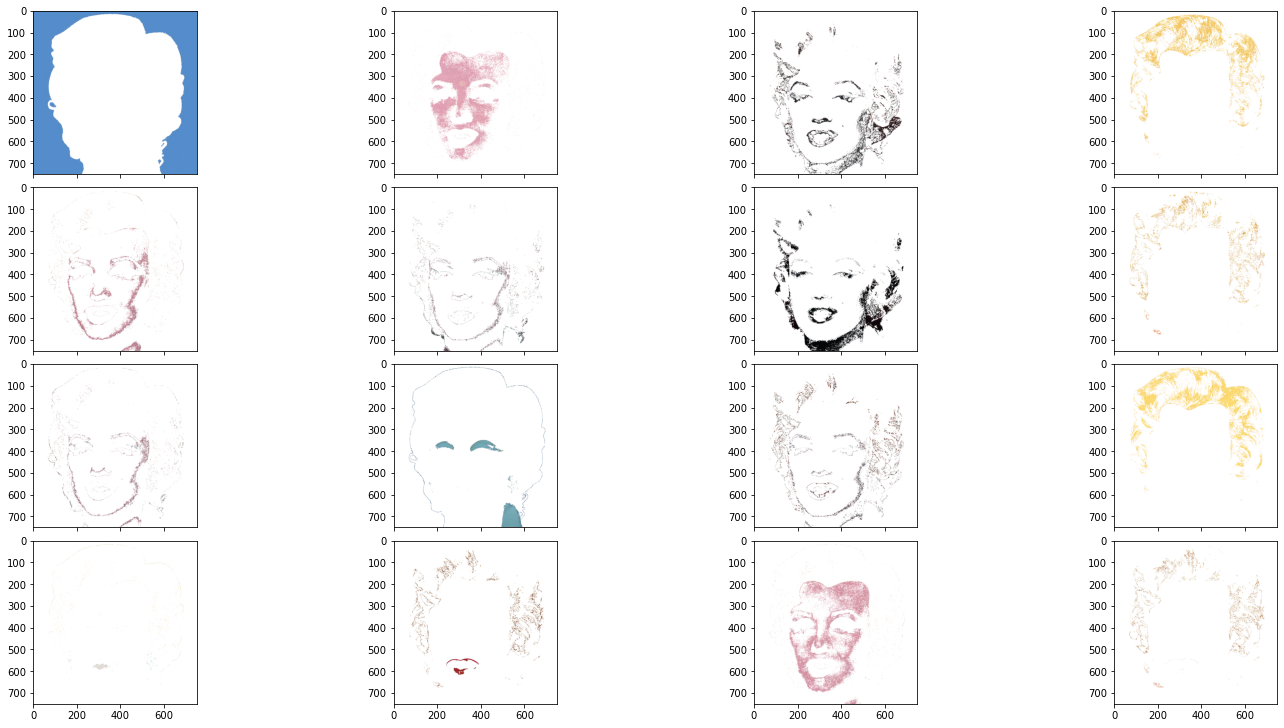

In [115]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('BlueS.png',1)))
ax[0][1].imshow(np.asarray(inspect('BlueS.png',2)))
ax[0][2].imshow(np.asarray(inspect('BlueS.png',3)))
ax[0][3].imshow(np.asarray(inspect('BlueS.png',4)))
ax[1][0].imshow(np.asarray(inspect('BlueS.png',5)))
ax[1][1].imshow(np.asarray(inspect('BlueS.png',6)))
ax[1][2].imshow(np.asarray(inspect('BlueS.png',7)))
ax[1][3].imshow(np.asarray(inspect('BlueS.png',8)))
ax[2][0].imshow(np.asarray(inspect('BlueS.png',9)))
ax[2][1].imshow(np.asarray(inspect('BlueS.png',10)))
ax[2][2].imshow(np.asarray(inspect('BlueS.png',11)))
ax[2][3].imshow(np.asarray(inspect('BlueS.png',12)))
ax[3][0].imshow(np.asarray(inspect('BlueS.png',13)))
ax[3][1].imshow(np.asarray(inspect('BlueS.png',14)))
ax[3][2].imshow(np.asarray(inspect('BlueS.png',15)))
ax[3][3].imshow(np.asarray(inspect('BlueS.png',0)))
fig.savefig('Blue_KM_Clusters.jpg')

In [598]:
df = get_data('RED.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]

In [19]:
im = Image.open('RED.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('RedS.png')

ValueError: not enough values to unpack (expected 5, got 1)

In [116]:
df = get_data('RedS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

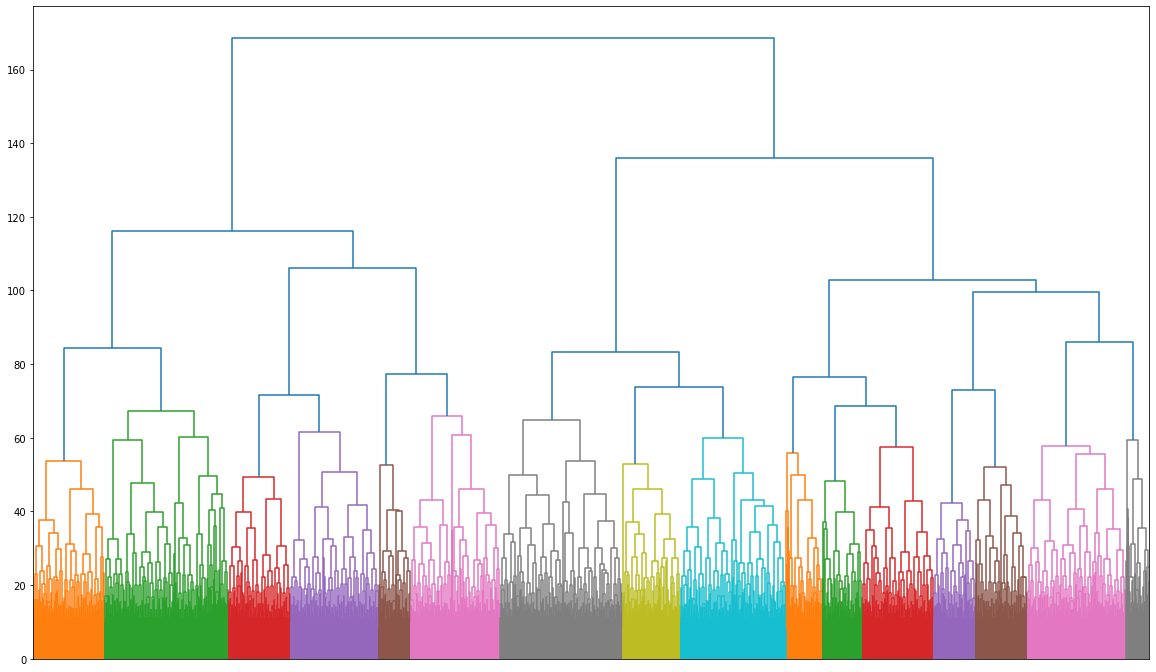

In [117]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 68)
plt.show()
fig.savefig('Red_Dendrogram.jpg')

In [118]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')
dfo = get_data('RedS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [119]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#bc1404 (188, 20, 4) (28.87%)',
 '#e4cc04 (228, 204, 4) (18.98%)',
 '#040404 (4, 4, 4) (14.77%)',
 '#e4acbc (228, 172, 188) (13.75%)',
 '#ecb4cc (236, 180, 204) (9.24%)',
 '#b49c0c (180, 156, 12) (3.21%)',
 '#543c1c (84, 60, 28) (2.54%)',
 '#ac848c (172, 132, 140) (2.21%)',
 '#7c6c0c (124, 108, 12) (2.10%)',
 '#74ccac (116, 204, 172) (1.53%)',
 '#84cccc (132, 204, 204) (1.00%)',
 '#745c5c (116, 92, 92) (0.81%)',
 '#9c8c3c (156, 140, 60) (0.57%)',
 '#e4bc7c (228, 188, 124) (0.19%)',
 '#2c5444 (44, 84, 68) (0.17%)',
 '#d46c74 (212, 108, 116) (0.04%)']

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/532296440.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc =10)


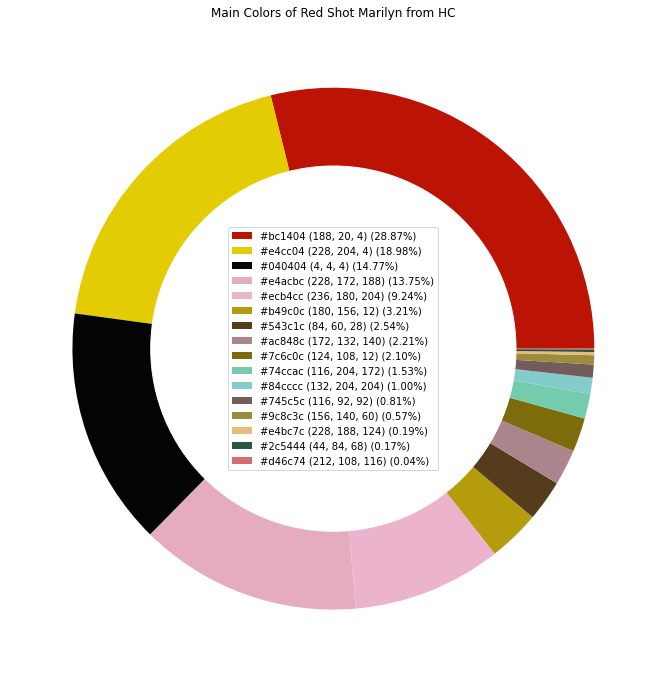

In [120]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props), loc =10)
plt.title('Main Colors of Red Shot Marilyn from HC')
plt.show()
fig.savefig('Red_HC_Donut.jpg')

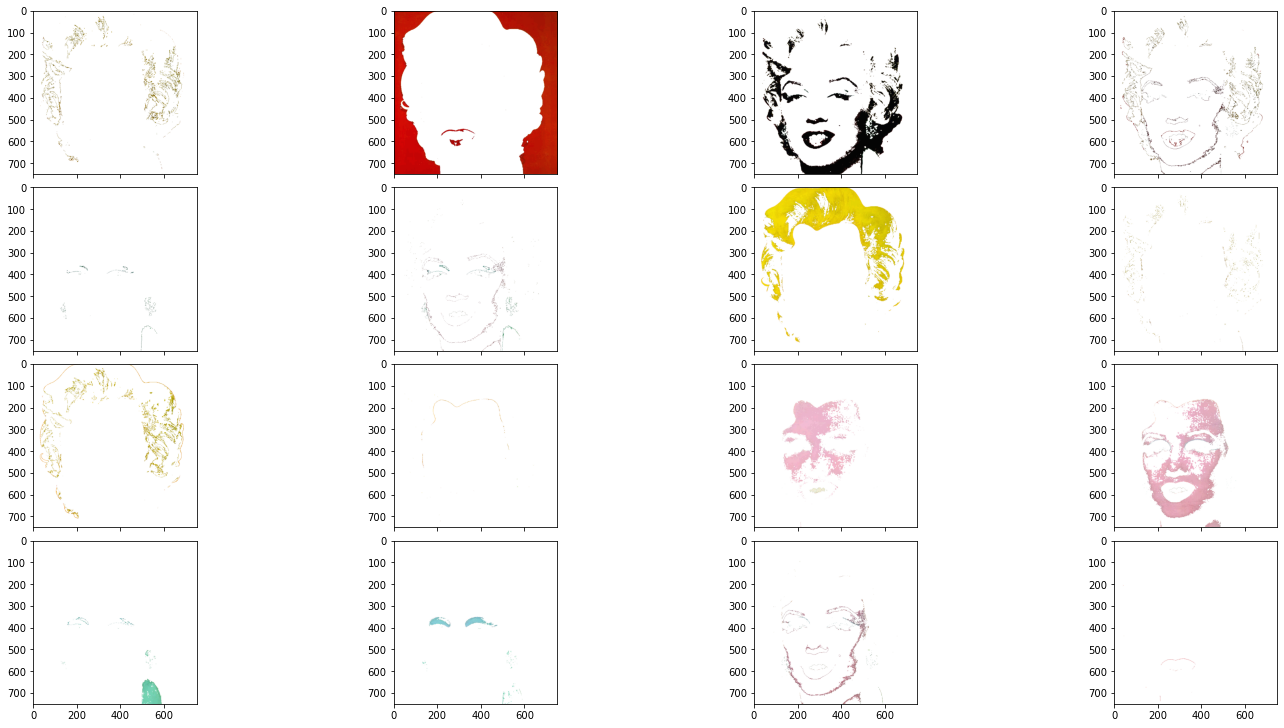

In [121]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('RedS.png',1)))
ax[0][1].imshow(np.asarray(inspect('RedS.png',2)))
ax[0][2].imshow(np.asarray(inspect('RedS.png',3)))
ax[0][3].imshow(np.asarray(inspect('RedS.png',4)))
ax[1][0].imshow(np.asarray(inspect('RedS.png',5)))
ax[1][1].imshow(np.asarray(inspect('RedS.png',6)))
ax[1][2].imshow(np.asarray(inspect('RedS.png',7)))
ax[1][3].imshow(np.asarray(inspect('RedS.png',8)))
ax[2][0].imshow(np.asarray(inspect('RedS.png',9)))
ax[2][1].imshow(np.asarray(inspect('RedS.png',10)))
ax[2][2].imshow(np.asarray(inspect('RedS.png',11)))
ax[2][3].imshow(np.asarray(inspect('RedS.png',12)))
ax[3][0].imshow(np.asarray(inspect('RedS.png',13)))
ax[3][1].imshow(np.asarray(inspect('RedS.png',14)))
ax[3][2].imshow(np.asarray(inspect('RedS.png',15)))
ax[3][3].imshow(np.asarray(inspect('RedS.png',16)))
fig.savefig('Red_HC_Clust.jpg')

In [122]:
df = get_data('RedS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 16, random_state = 0)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [123]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#ecb4c4 (236, 180, 196) (16.94%)',
 '#040404 (4, 4, 4) (11.78%)',
 '#ecd404 (236, 212, 4) (11.20%)',
 '#bc1c04 (188, 28, 4) (10.56%)',
 '#cc0404 (204, 4, 4) (9.64%)',
 '#ac1404 (172, 20, 4) (8.67%)',
 '#d4bc04 (212, 188, 4) (6.44%)',
 '#dca4ac (220, 164, 172) (6.26%)',
 '#ac9414 (172, 148, 20) (3.16%)',
 '#241c0c (36, 28, 12) (2.96%)',
 '#74ccb4 (116, 204, 180) (2.67%)',
 '#4c3c1c (76, 60, 28) (2.43%)',
 '#7c6c14 (124, 108, 20) (2.00%)',
 '#d4bc2c (212, 188, 44) (1.98%)',
 '#b4848c (180, 132, 140) (1.88%)',
 '#745c5c (116, 92, 92) (1.44%)']

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/3450921944.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc = 10)


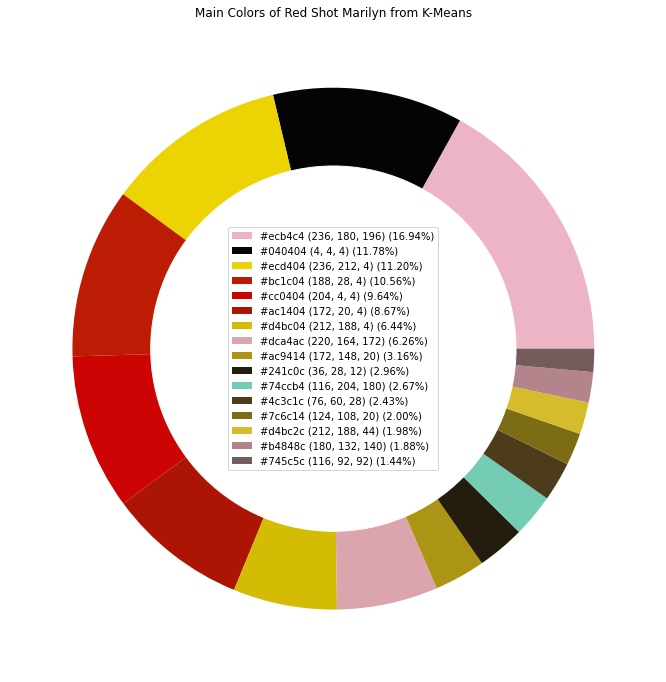

In [124]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props), loc = 10)
plt.title('Main Colors of Red Shot Marilyn from K-Means')
plt.show()
fig.savefig('Red_KM_Donut.jpg')

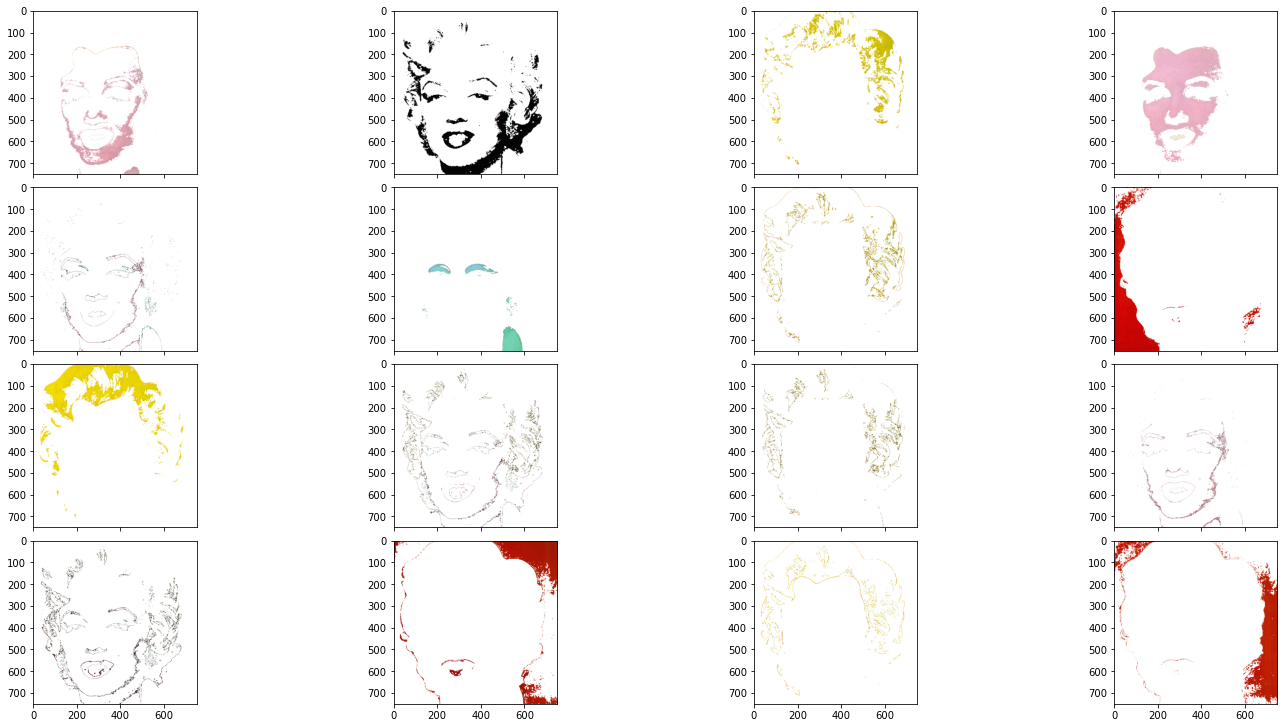

In [125]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('RedS.png',1)))
ax[0][1].imshow(np.asarray(inspect('RedS.png',2)))
ax[0][2].imshow(np.asarray(inspect('RedS.png',3)))
ax[0][3].imshow(np.asarray(inspect('RedS.png',4)))
ax[1][0].imshow(np.asarray(inspect('RedS.png',5)))
ax[1][1].imshow(np.asarray(inspect('RedS.png',6)))
ax[1][2].imshow(np.asarray(inspect('RedS.png',7)))
ax[1][3].imshow(np.asarray(inspect('RedS.png',8)))
ax[2][0].imshow(np.asarray(inspect('RedS.png',9)))
ax[2][1].imshow(np.asarray(inspect('RedS.png',10)))
ax[2][2].imshow(np.asarray(inspect('RedS.png',11)))
ax[2][3].imshow(np.asarray(inspect('RedS.png',12)))
ax[3][0].imshow(np.asarray(inspect('RedS.png',13)))
ax[3][1].imshow(np.asarray(inspect('RedS.png',14)))
ax[3][2].imshow(np.asarray(inspect('RedS.png',15)))
ax[3][3].imshow(np.asarray(inspect('RedS.png',0)))
fig.savefig('Red_KM_Clust.jpg')

In [ ]:
#Blue HC outperforms K-Means #K-Means outperforms HC for Red

In [92]:
df = get_data('GREEN.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]

In [76]:
im = Image.open('GREEN.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('GreenS.png')

In [126]:
df = get_data('GreenS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

In [127]:
df

R    G    B
0       148  180  172
1       148  188  172
2       156  188  180
6       156  188  172
40      156  196  180
...     ...  ...  ...
516497  180  172  140
516499  188  196  164
520817  188  196  156
522348  124  132   92
523054  196  188  148

[1891 rows x 3 columns]

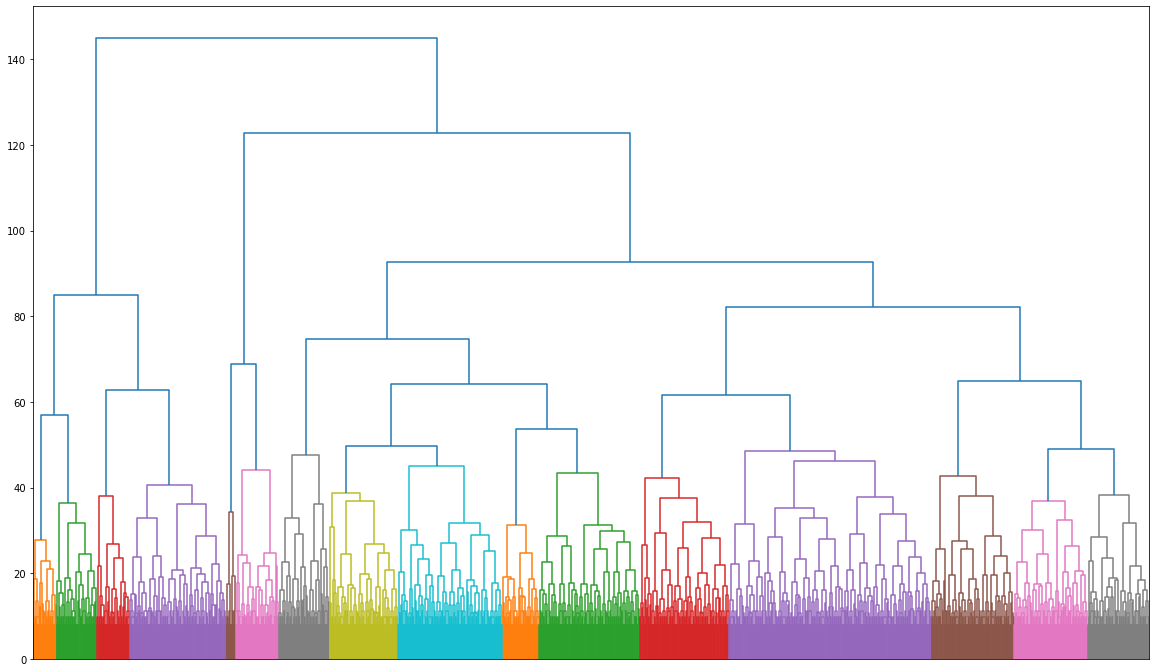

In [128]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 48.5)
plt.show()
fig.savefig('Green_Dendrogram.jpg')

In [129]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')
dfo = get_data('GreenS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [130]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/4230585357.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc = 10)


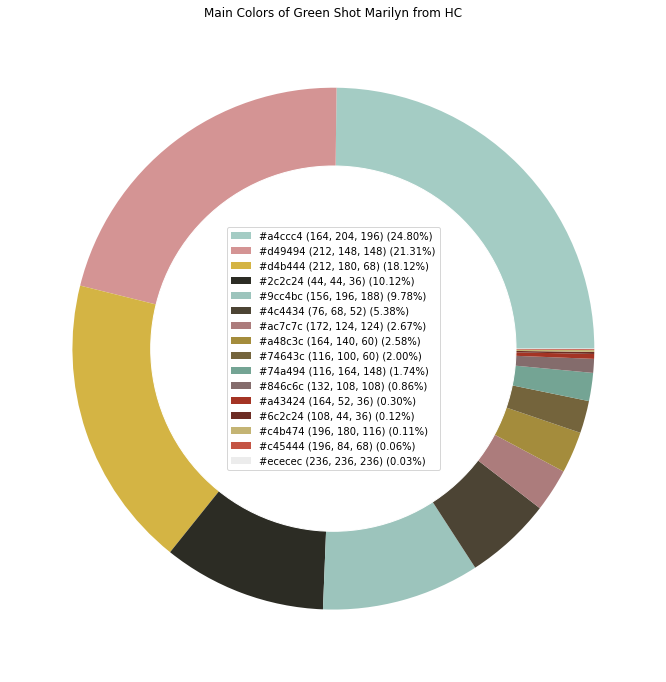

In [131]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props), loc = 10)
plt.title('Main Colors of Green Shot Marilyn from HC')
plt.show()
fig.savefig('Green_HC_Donut.jpg')

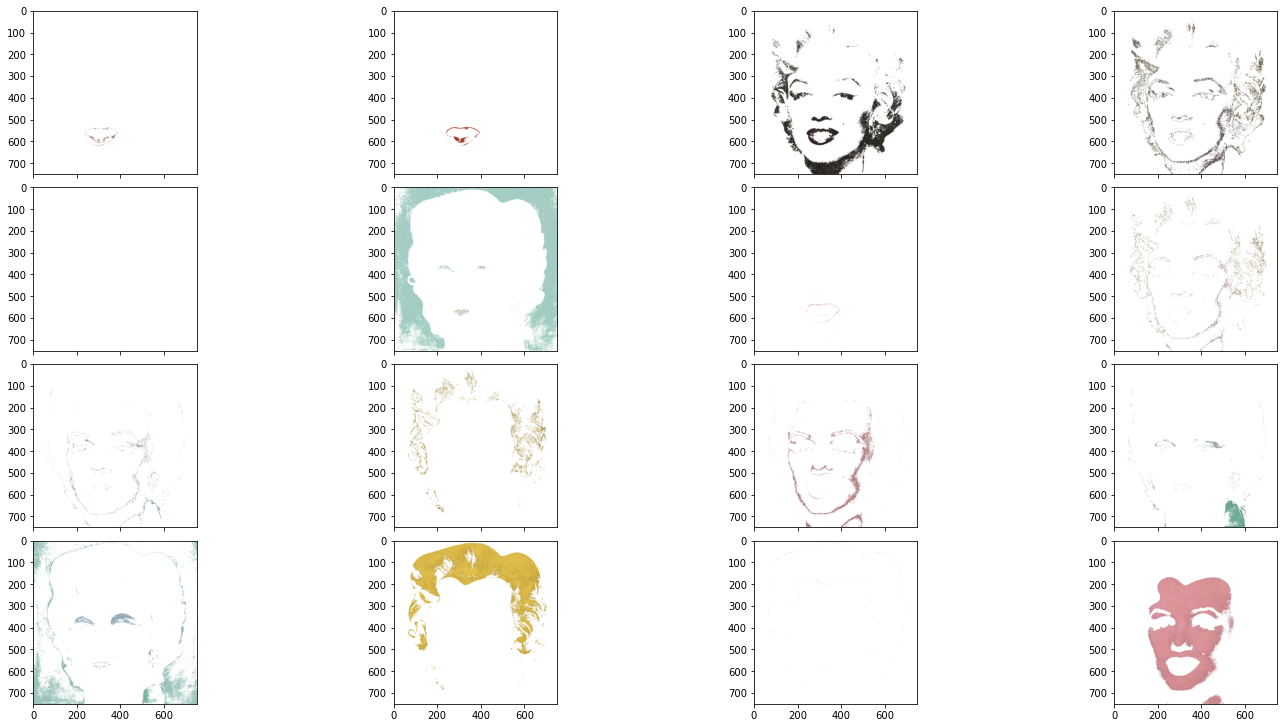

In [132]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('GreenS.png',1)))
ax[0][1].imshow(np.asarray(inspect('GreenS.png',2)))
ax[0][2].imshow(np.asarray(inspect('GreenS.png',3)))
ax[0][3].imshow(np.asarray(inspect('GreenS.png',4)))
ax[1][0].imshow(np.asarray(inspect('GreenS.png',5)))
ax[1][1].imshow(np.asarray(inspect('GreenS.png',6)))
ax[1][2].imshow(np.asarray(inspect('GreenS.png',7)))
ax[1][3].imshow(np.asarray(inspect('GreenS.png',8)))
ax[2][0].imshow(np.asarray(inspect('GreenS.png',9)))
ax[2][1].imshow(np.asarray(inspect('GreenS.png',10)))
ax[2][2].imshow(np.asarray(inspect('GreenS.png',11)))
ax[2][3].imshow(np.asarray(inspect('GreenS.png',12)))
ax[3][0].imshow(np.asarray(inspect('GreenS.png',13)))
ax[3][1].imshow(np.asarray(inspect('GreenS.png',14)))
ax[3][2].imshow(np.asarray(inspect('GreenS.png',15)))
ax[3][3].imshow(np.asarray(inspect('GreenS.png',16)))
fig.savefig('Green_HC_Clust.jpg')

In [133]:
df = get_data('GreenS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 16, random_state = 0)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [134]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#a4ccc4 (164, 204, 196) (21.19%)',
 '#dc949c (220, 148, 156) (15.26%)',
 '#9cc4bc (156, 196, 188) (12.52%)',
 '#dcbc4c (220, 188, 76) (8.45%)',
 '#d4b444 (212, 180, 68) (7.88%)',
 '#cc848c (204, 132, 140) (6.09%)',
 '#34342c (52, 52, 44) (5.18%)',
 '#2c2424 (44, 36, 36) (4.91%)',
 '#b49c3c (180, 156, 60) (3.35%)',
 '#443c34 (68, 60, 52) (3.05%)',
 '#5c543c (92, 84, 60) (2.82%)',
 '#ac7c7c (172, 124, 124) (2.62%)',
 '#74ac9c (116, 172, 156) (2.56%)',
 '#8c743c (140, 116, 60) (2.31%)',
 '#7c6464 (124, 100, 100) (1.42%)',
 '#a43424 (164, 52, 36) (0.39%)']

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/2913138186.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc =10)


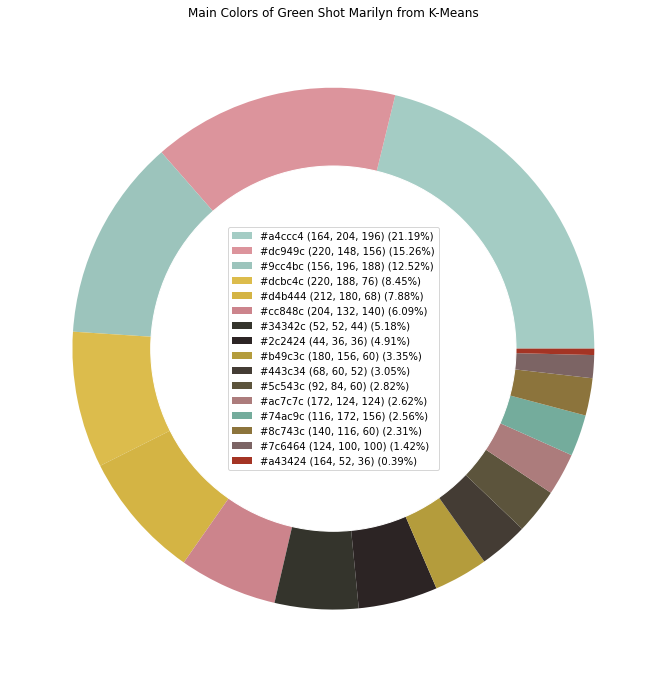

In [135]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props), loc =10)
plt.title('Main Colors of Green Shot Marilyn from K-Means')
plt.show()
fig.savefig('Green_KM_Donut.jpg')

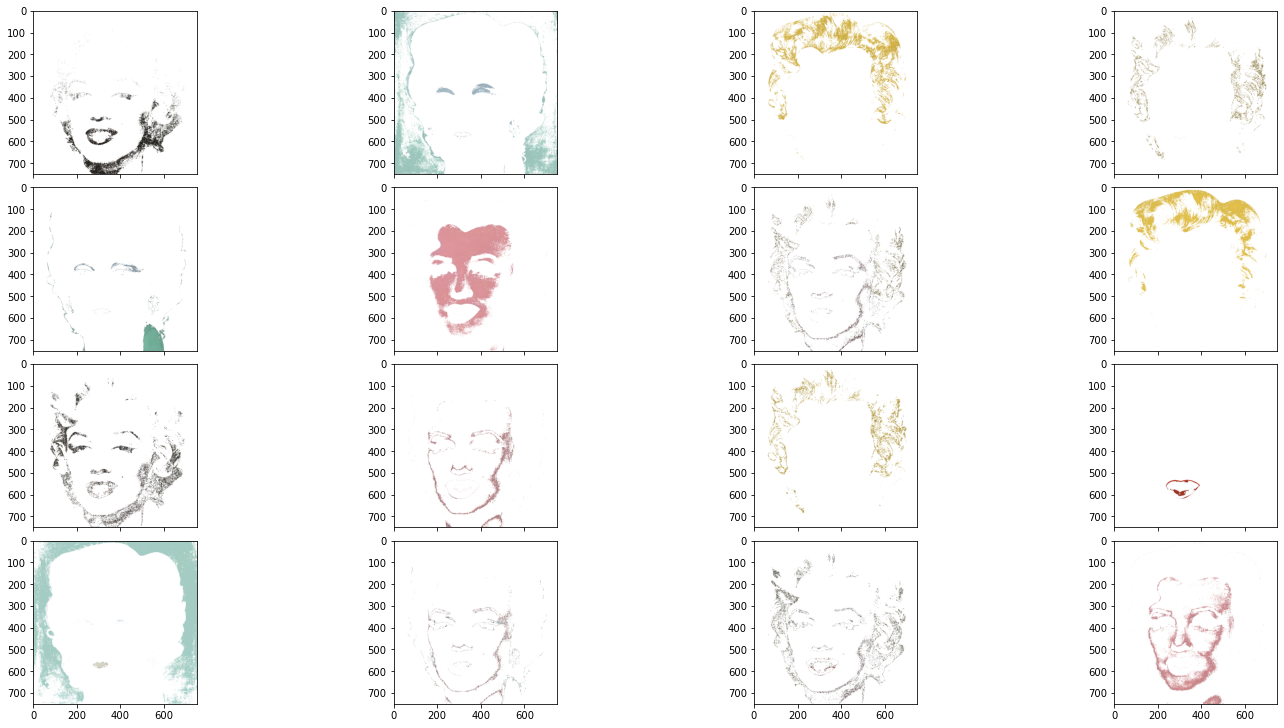

In [136]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('GreenS.png',1)))
ax[0][1].imshow(np.asarray(inspect('GreenS.png',2)))
ax[0][2].imshow(np.asarray(inspect('GreenS.png',3)))
ax[0][3].imshow(np.asarray(inspect('GreenS.png',4)))
ax[1][0].imshow(np.asarray(inspect('GreenS.png',5)))
ax[1][1].imshow(np.asarray(inspect('GreenS.png',6)))
ax[1][2].imshow(np.asarray(inspect('GreenS.png',7)))
ax[1][3].imshow(np.asarray(inspect('GreenS.png',8)))
ax[2][0].imshow(np.asarray(inspect('GreenS.png',9)))
ax[2][1].imshow(np.asarray(inspect('GreenS.png',10)))
ax[2][2].imshow(np.asarray(inspect('GreenS.png',11)))
ax[2][3].imshow(np.asarray(inspect('GreenS.png',12)))
ax[3][0].imshow(np.asarray(inspect('GreenS.png',13)))
ax[3][1].imshow(np.asarray(inspect('GreenS.png',14)))
ax[3][2].imshow(np.asarray(inspect('GreenS.png',15)))
ax[3][3].imshow(np.asarray(inspect('GreenS.png',0)))
fig.savefig('Green_KM_Clust.jpg')

In [112]:
df = get_data('AQUA.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]
im = Image.open('AQUA.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('AquaS.png')

In [137]:
df = get_data('AquaS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

In [138]:
df

R    G    B
0       100  196  188
1        84  196  188
2        76  188  180
3        76  180  180
4        68  180  188
...     ...  ...  ...
525302   28  172  148
525307   60  172  140
526051   36  180  164
526052   20  172  148
526125   92  204  188

[6103 rows x 3 columns]

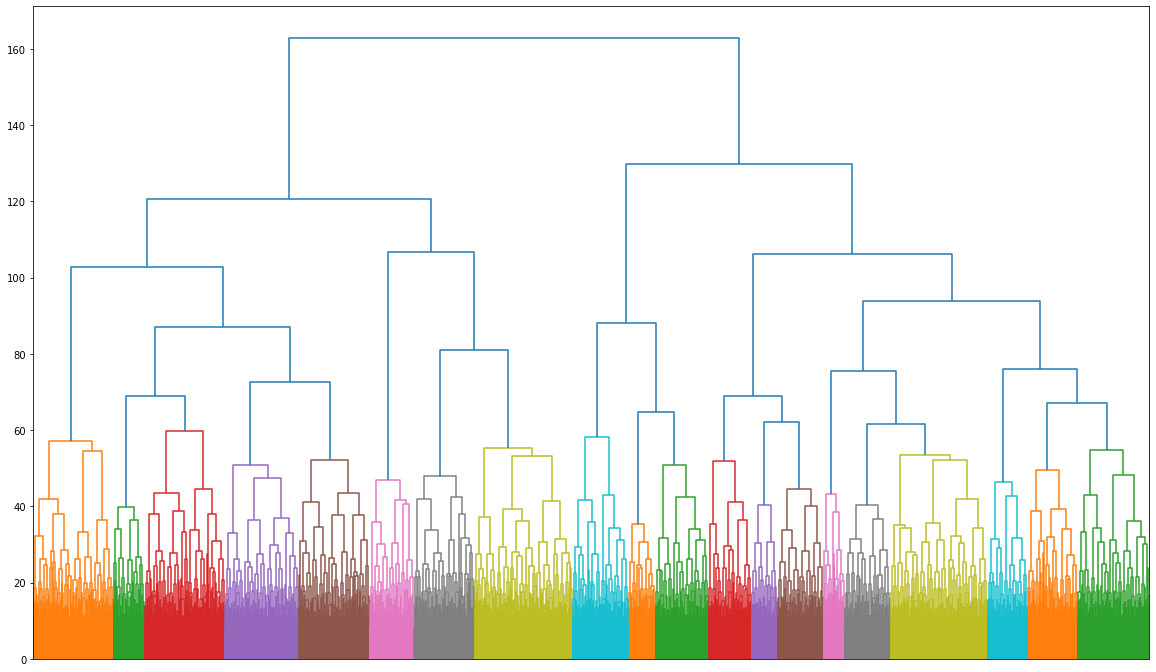

In [139]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 60)
plt.show()
fig.savefig('Aqua_Dendrogram.jpg')

In [140]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 20,criterion = 'maxclust', method = 'average')
dfo = get_data('AquaS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [141]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*20)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/380599958.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc =10)


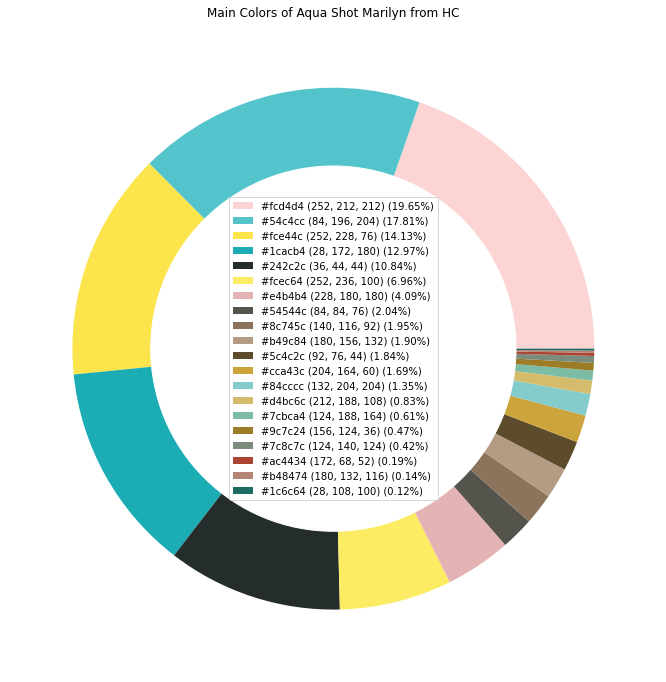

In [142]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props), loc =10)
plt.title('Main Colors of Aqua Shot Marilyn from HC')
plt.show()
fig.savefig('Aqua_HC_Donut.jpg')

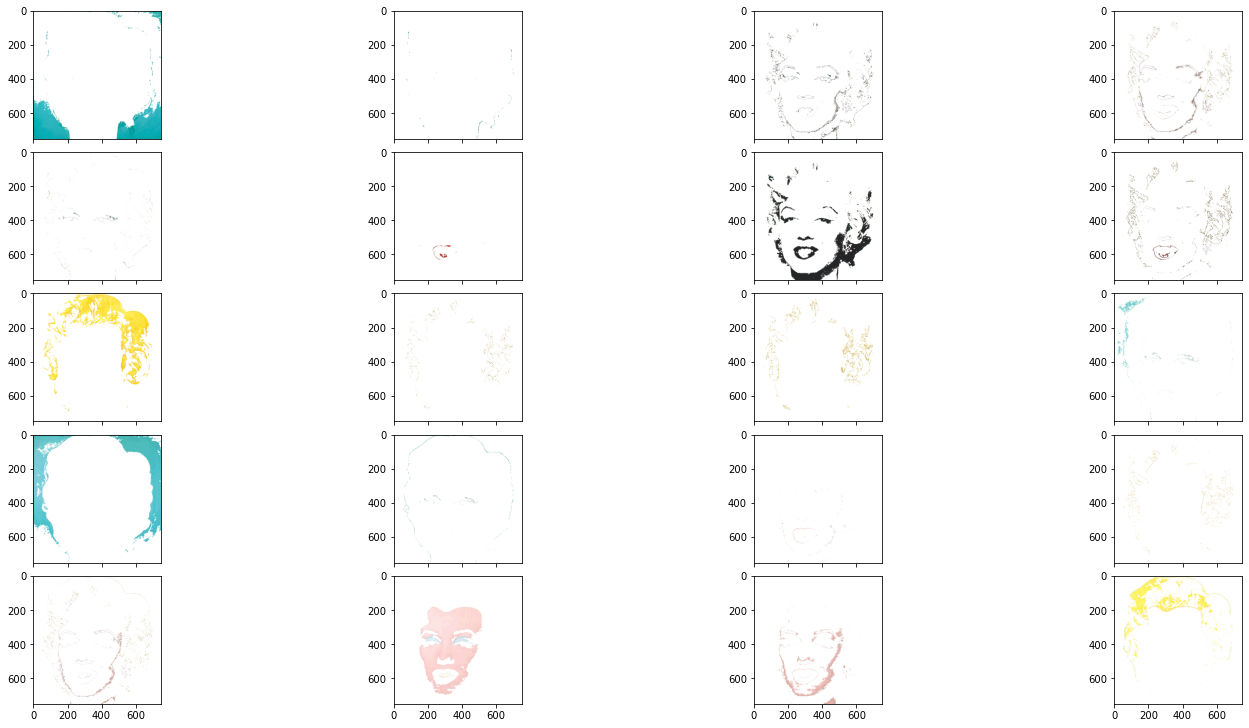

In [143]:
fig, ax = plt.subplots(nrows = 5, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('AquaS.png',1)))
ax[0][1].imshow(np.asarray(inspect('AquaS.png',2)))
ax[0][2].imshow(np.asarray(inspect('AquaS.png',3)))
ax[0][3].imshow(np.asarray(inspect('AquaS.png',4)))
ax[1][0].imshow(np.asarray(inspect('AquaS.png',5)))
ax[1][1].imshow(np.asarray(inspect('AquaS.png',6)))
ax[1][2].imshow(np.asarray(inspect('AquaS.png',7)))
ax[1][3].imshow(np.asarray(inspect('AquaS.png',8)))
ax[2][0].imshow(np.asarray(inspect('AquaS.png',9)))
ax[2][1].imshow(np.asarray(inspect('AquaS.png',10)))
ax[2][2].imshow(np.asarray(inspect('AquaS.png',11)))
ax[2][3].imshow(np.asarray(inspect('AquaS.png',12)))
ax[3][0].imshow(np.asarray(inspect('AquaS.png',13)))
ax[3][1].imshow(np.asarray(inspect('AquaS.png',14)))
ax[3][2].imshow(np.asarray(inspect('AquaS.png',15)))
ax[3][3].imshow(np.asarray(inspect('AquaS.png',16)))
ax[4][0].imshow(np.asarray(inspect('AquaS.png',17)))
ax[4][1].imshow(np.asarray(inspect('AquaS.png',18)))
ax[4][2].imshow(np.asarray(inspect('AquaS.png',19)))
ax[4][3].imshow(np.asarray(inspect('AquaS.png',20)))
fig.savefig('Aqua_HC_Clust.jpg')

In [144]:
df = get_data('AquaS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 20, random_state = 0)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [145]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*20)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]
props

['#fcd4d4 (252, 212, 212) (12.73%)',
 '#24242c (36, 36, 44) (9.81%)',
 '#fce44c (252, 228, 76) (9.33%)',
 '#44bcbc (68, 188, 188) (8.71%)',
 '#fcec64 (252, 236, 100) (7.08%)',
 '#fcdcdc (252, 220, 220) (6.91%)',
 '#5cc4cc (92, 196, 204) (6.28%)',
 '#2cb4bc (44, 180, 188) (5.89%)',
 '#74ccd4 (116, 204, 212) (5.77%)',
 '#04acb4 (4, 172, 180) (5.36%)',
 '#4c443c (76, 68, 60) (3.29%)',
 '#e4bcb4 (228, 188, 180) (3.28%)',
 '#fcdc2c (252, 220, 44) (3.23%)',
 '#ccac44 (204, 172, 68) (2.36%)',
 '#cca49c (204, 164, 156) (2.23%)',
 '#6c6454 (108, 100, 84) (2.07%)',
 '#9c8474 (156, 132, 116) (1.87%)',
 '#947434 (148, 116, 52) (1.65%)',
 '#f4e484 (244, 228, 132) (1.33%)',
 '#8cbc9c (140, 188, 156) (0.82%)']

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/4038816906.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc = 10)


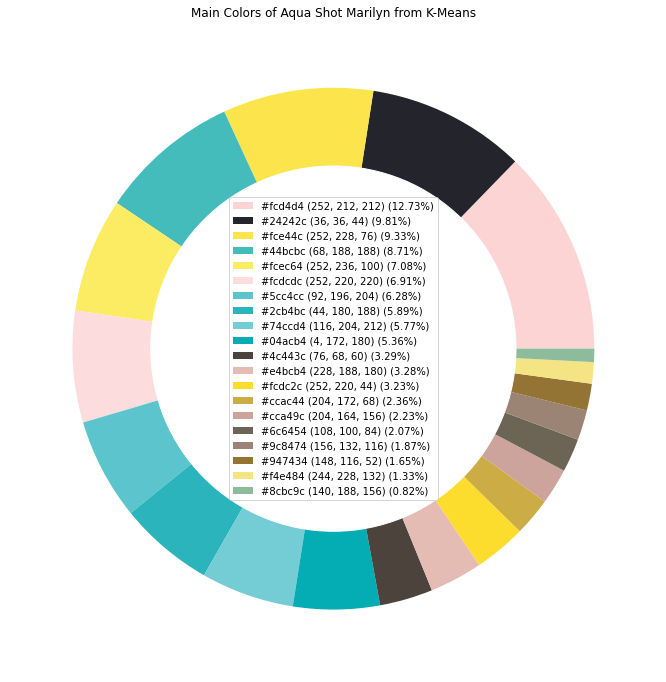

In [146]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props), loc = 10)
plt.title('Main Colors of Aqua Shot Marilyn from K-Means')
plt.show()
fig.savefig('Aqua_KM_Donut.jpg')

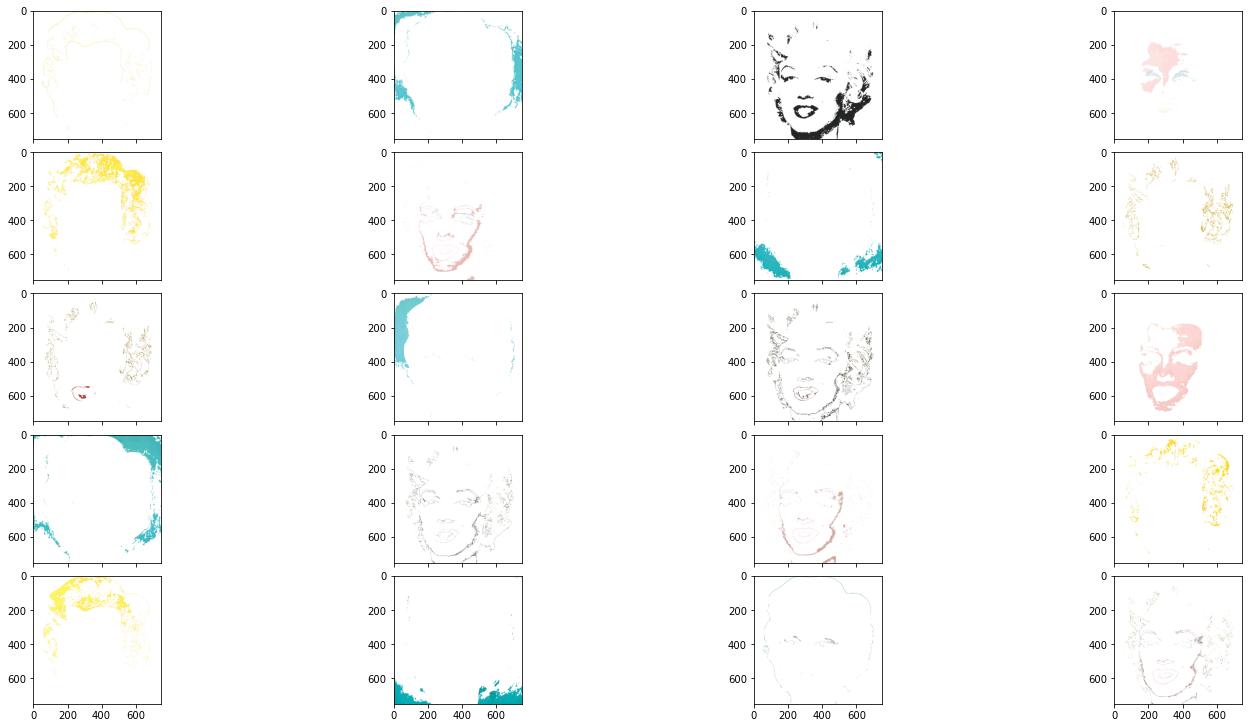

In [147]:
fig, ax = plt.subplots(nrows = 5, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('AquaS.png',1)))
ax[0][1].imshow(np.asarray(inspect('AquaS.png',2)))
ax[0][2].imshow(np.asarray(inspect('AquaS.png',3)))
ax[0][3].imshow(np.asarray(inspect('AquaS.png',4)))
ax[1][0].imshow(np.asarray(inspect('AquaS.png',5)))
ax[1][1].imshow(np.asarray(inspect('AquaS.png',6)))
ax[1][2].imshow(np.asarray(inspect('AquaS.png',7)))
ax[1][3].imshow(np.asarray(inspect('AquaS.png',8)))
ax[2][0].imshow(np.asarray(inspect('AquaS.png',9)))
ax[2][1].imshow(np.asarray(inspect('AquaS.png',10)))
ax[2][2].imshow(np.asarray(inspect('AquaS.png',11)))
ax[2][3].imshow(np.asarray(inspect('AquaS.png',12)))
ax[3][0].imshow(np.asarray(inspect('AquaS.png',13)))
ax[3][1].imshow(np.asarray(inspect('AquaS.png',14)))
ax[3][2].imshow(np.asarray(inspect('AquaS.png',15)))
ax[3][3].imshow(np.asarray(inspect('AquaS.png',16)))
ax[4][0].imshow(np.asarray(inspect('AquaS.png',17)))
ax[4][1].imshow(np.asarray(inspect('AquaS.png',18)))
ax[4][2].imshow(np.asarray(inspect('AquaS.png',19)))
ax[4][3].imshow(np.asarray(inspect('AquaS.png',0)))
fig.savefig('Aqua_KM_Clust.jpg')

In [17]:
df = get_data('ORANGE.png')
center = sorted(list(range(4,256,8))*8)
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)
df = [tuple(i) for i in df.to_numpy()]
im = Image.open('ORANGE.png') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im.save('OrangeS.png')

In [148]:
df = get_data('OrangeS.png')
df = df.iloc[:,2:].drop_duplicates()
dists = linkage(np.asarray(df),method = 'average')

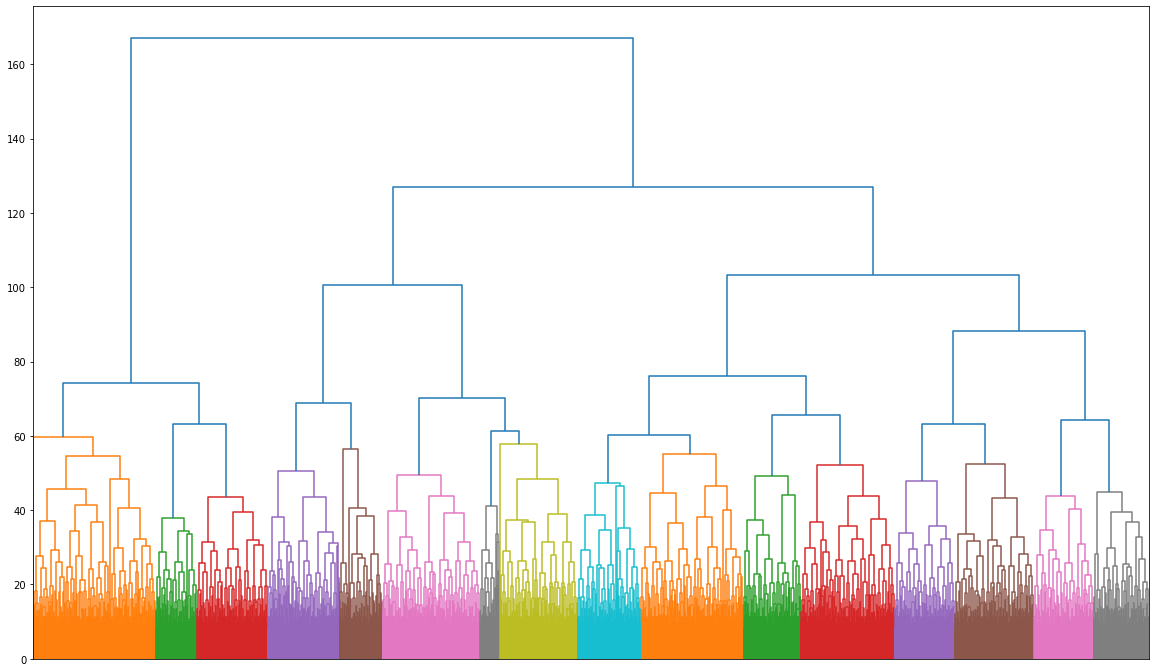

In [149]:
fig = plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 60)
plt.show()
fig.savefig('Orange_Dendrogram.jpg')

In [150]:
df['Cluster'] = fclusterdata(np.asarray(df),t = 16,criterion = 'maxclust', method = 'average')
dfo = get_data('OrangeS.png')
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [151]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/1475451919.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props), loc = 10)


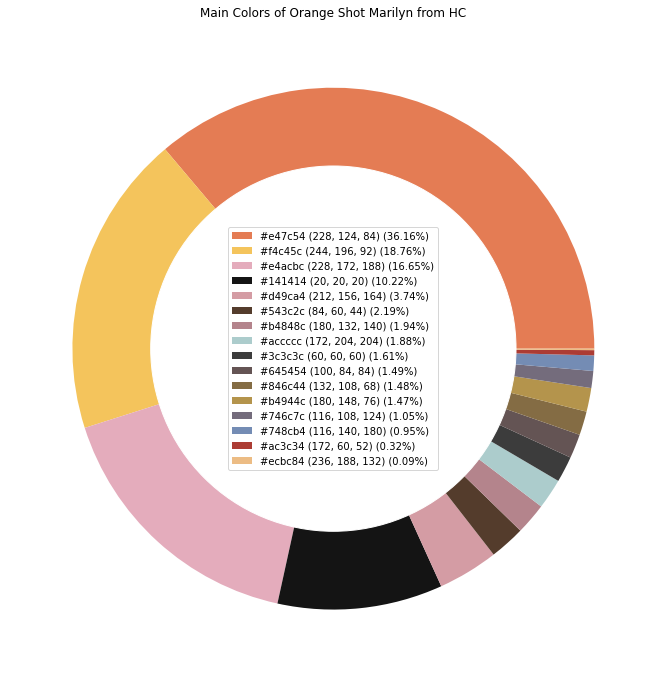

In [152]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props), loc = 10)
plt.title('Main Colors of Orange Shot Marilyn from HC')
plt.show()
fig.savefig('Orange_HC_Donut.jpg')

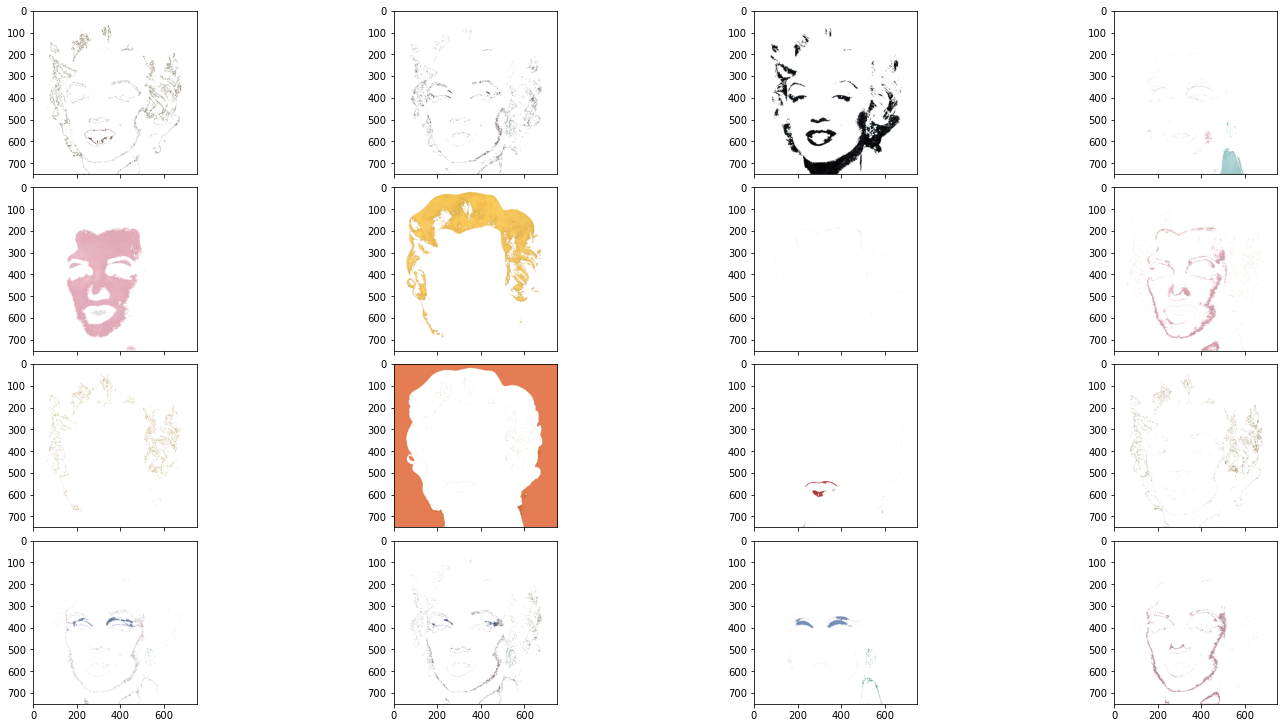

In [153]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('OrangeS.png',1)))
ax[0][1].imshow(np.asarray(inspect('OrangeS.png',2)))
ax[0][2].imshow(np.asarray(inspect('OrangeS.png',3)))
ax[0][3].imshow(np.asarray(inspect('OrangeS.png',4)))
ax[1][0].imshow(np.asarray(inspect('OrangeS.png',5)))
ax[1][1].imshow(np.asarray(inspect('OrangeS.png',6)))
ax[1][2].imshow(np.asarray(inspect('OrangeS.png',7)))
ax[1][3].imshow(np.asarray(inspect('OrangeS.png',8)))
ax[2][0].imshow(np.asarray(inspect('OrangeS.png',9)))
ax[2][1].imshow(np.asarray(inspect('OrangeS.png',10)))
ax[2][2].imshow(np.asarray(inspect('OrangeS.png',11)))
ax[2][3].imshow(np.asarray(inspect('OrangeS.png',12)))
ax[3][0].imshow(np.asarray(inspect('OrangeS.png',13)))
ax[3][1].imshow(np.asarray(inspect('OrangeS.png',14)))
ax[3][2].imshow(np.asarray(inspect('OrangeS.png',15)))
ax[3][3].imshow(np.asarray(inspect('OrangeS.png',16)))
fig.savefig('Orange_HC_Clust.jpg')

In [154]:
df = get_data('OrangeS.png')
dfn = df.iloc[:,2:]
kmeans = KMeans(n_clusters = 16, random_state = 0)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [155]:
props = df['Cluster'].value_counts(normalize = True)
ind = list(props.index)
col = df.groupby('Cluster').median()[['R','G','B']]
col = col.loc[ind,:]
col = col.astype(int)
col = [tuple(i) for i in col.to_numpy()]
codes = ['#%02x%02x%02x' % i for i in col]
props = 100*props.round(decimals = 4)
props.index = codes
props = props.apply(lambda x:f'{x:.2f}')
props = props.str.cat(['%']*16)
props = [i+' '+str(k)+' ('+j+')' for i,j,k in zip(list(props.index),list(props),col)]

/var/folders/py/yn4jz9f166sd76n0j33k5ny00000gn/T/ipykernel_44741/3074242764.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels = np.array(props),loc = 10)


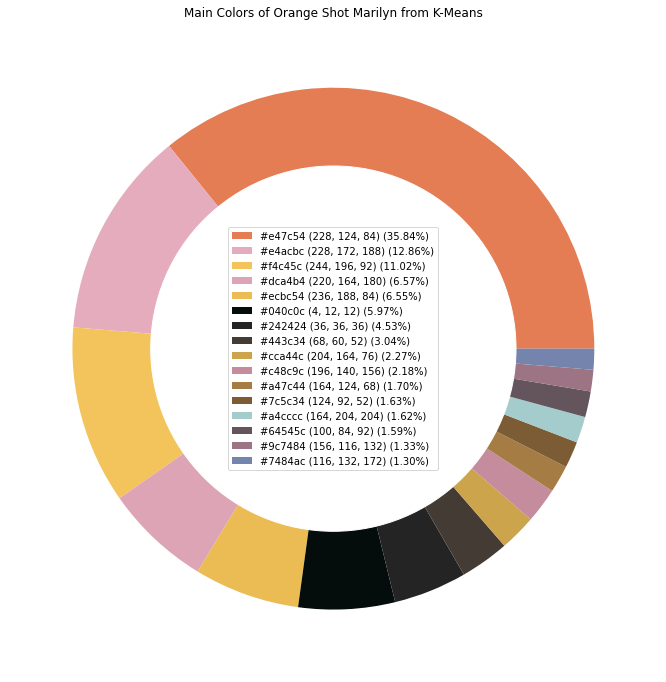

In [156]:
fig = plt.figure(figsize = (20,12))
patches, texts = plt.pie(df['Cluster'].value_counts(), colors = codes)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(patches,labels = np.array(props),loc = 10)
plt.title('Main Colors of Orange Shot Marilyn from K-Means')
plt.show()
fig.savefig('Orange_KM_Donut.jpg')

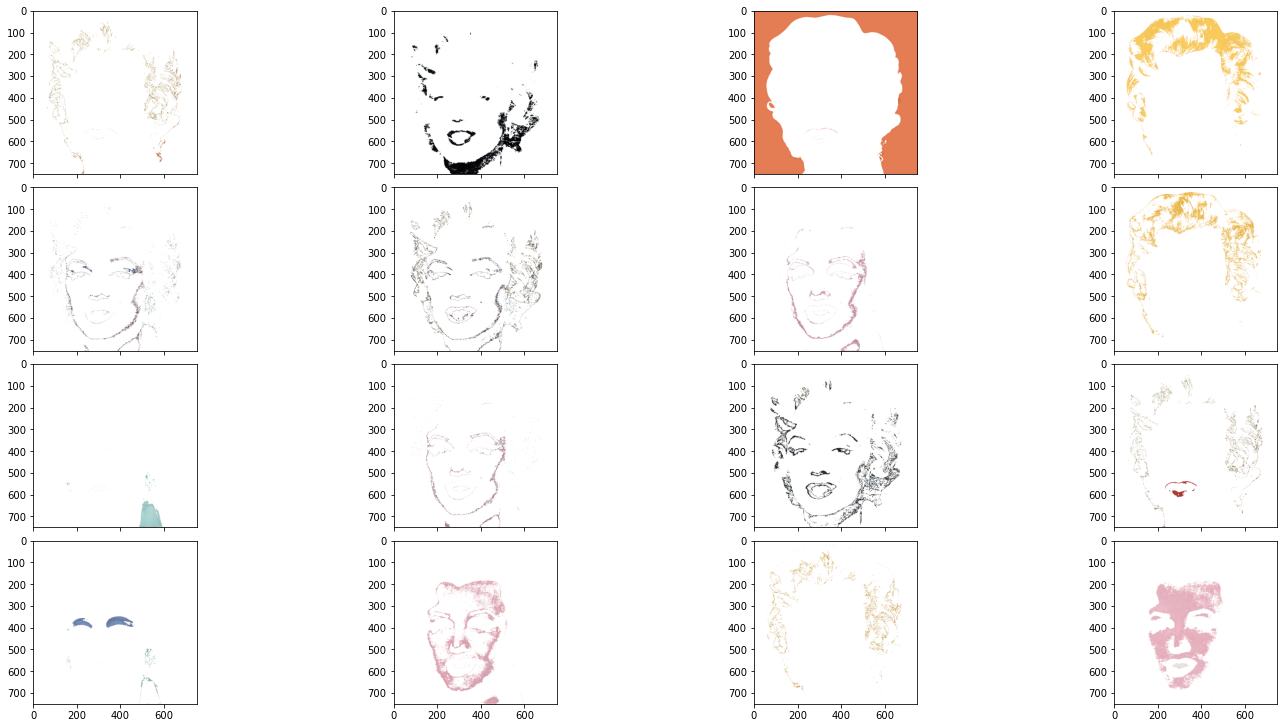

In [157]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(inspect('OrangeS.png',1)))
ax[0][1].imshow(np.asarray(inspect('OrangeS.png',2)))
ax[0][2].imshow(np.asarray(inspect('OrangeS.png',3)))
ax[0][3].imshow(np.asarray(inspect('OrangeS.png',4)))
ax[1][0].imshow(np.asarray(inspect('OrangeS.png',5)))
ax[1][1].imshow(np.asarray(inspect('OrangeS.png',6)))
ax[1][2].imshow(np.asarray(inspect('OrangeS.png',7)))
ax[1][3].imshow(np.asarray(inspect('OrangeS.png',8)))
ax[2][0].imshow(np.asarray(inspect('OrangeS.png',9)))
ax[2][1].imshow(np.asarray(inspect('OrangeS.png',10)))
ax[2][2].imshow(np.asarray(inspect('OrangeS.png',11)))
ax[2][3].imshow(np.asarray(inspect('OrangeS.png',12)))
ax[3][0].imshow(np.asarray(inspect('OrangeS.png',13)))
ax[3][1].imshow(np.asarray(inspect('OrangeS.png',14)))
ax[3][2].imshow(np.asarray(inspect('OrangeS.png',15)))
ax[3][3].imshow(np.asarray(inspect('OrangeS.png',0)))
fig.savefig('Orange_KM_Clust.jpg')

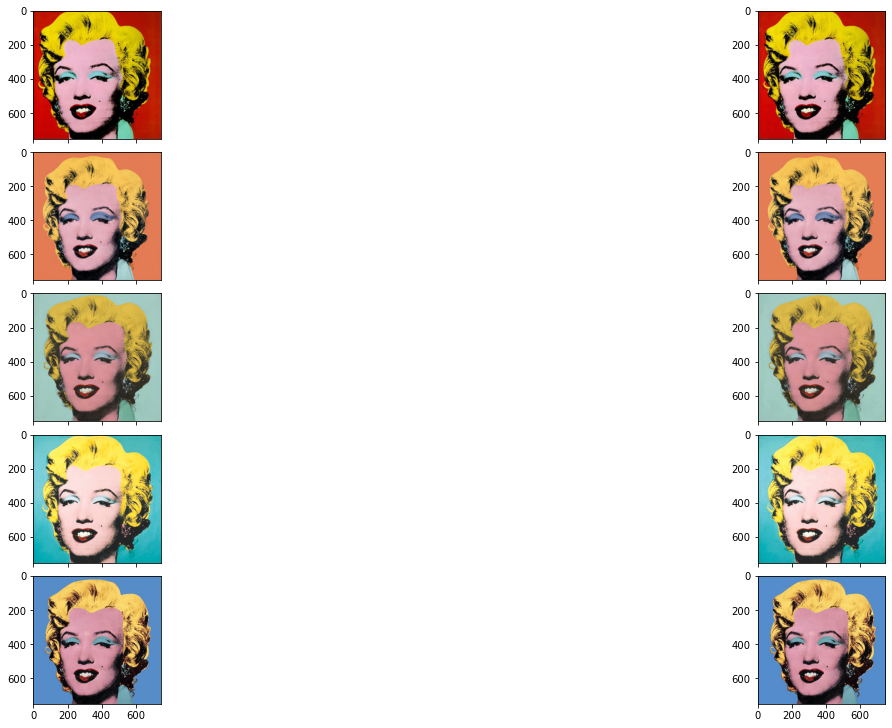

In [44]:
fig, ax = plt.subplots(nrows = 5, ncols = 2, layout = 'constrained', sharex = True, figsize=(20, 10))
ax[0][0].imshow(np.asarray(Image.open('RED.png')))
ax[0][1].imshow(np.asarray(Image.open('RedS.png')))
ax[1][0].imshow(np.asarray(Image.open('ORANGE.png')))
ax[1][1].imshow(np.asarray(Image.open('OrangeS.png')))
ax[2][0].imshow(np.asarray(Image.open('GREEN.png')))
ax[2][1].imshow(np.asarray(Image.open('GreenS.png')))
ax[3][0].imshow(np.asarray(Image.open('AQUA.png')))
ax[3][1].imshow(np.asarray(Image.open('AquaS.png')))
ax[4][0].imshow(np.asarray(Image.open('BLUE.jpeg')))
ax[4][1].imshow(np.asarray(Image.open('BlueS.png')))
fig.savefig('Comparison.jpg')